In [71]:
# Segundo parcial
# Melannie Aranza Martínez Velasco 
# Modelos Computacionales II

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.io import loadmat
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [73]:
## Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

In [74]:
### Data set de Coactivation Matrix

In [75]:
mat_path = r'C:\Users\melan\OneDrive\Documentos\Escuela\Modelos computacionales\Coactivation_matrix (2).mat'
data = scipy.io.loadmat(mat_path)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])

In [76]:
coactivation_matrix = data['Coactivation_matrix']
coactivation_matrix.shape, coactivation_matrix[:5, :5]

((638, 638),
 array([[0.        , 0.16071429, 0.11148649, 0.        , 0.13809524],
        [0.16071429, 0.        , 0.06825939, 0.        , 0.04205607],
        [0.11148649, 0.06825939, 0.        , 0.22419929, 0.        ],
        [0.        , 0.        , 0.22419929, 0.        , 0.        ],
        [0.13809524, 0.04205607, 0.        , 0.        , 0.        ]]))

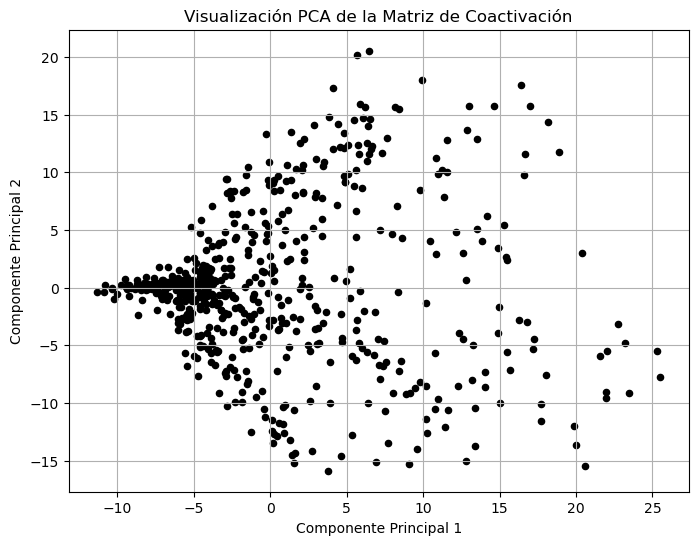

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(coactivation_matrix)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=20, color='black')
plt.title('Visualización PCA de la Matriz de Coactivación')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [78]:
#### Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
#### Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset 


C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


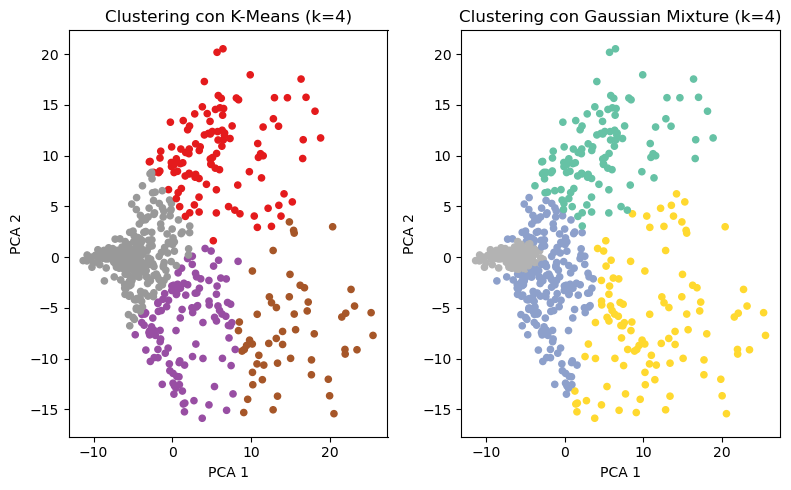

In [79]:
# K-Means con k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Gaussian Mixture Model con k=4
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# K-Means
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=20)
axs[0].set_title('Clustering con K-Means (k=4)')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')

# Gaussian Mixture
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set2', s=20)
axs[1].set_title('Clustering con Gaussian Mixture (k=4)')
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

In [80]:
#### me trabé aquí y lo empecé a hacer de otra forma

In [81]:
### Método del codo -> encontrar número óptimo de clusters

In [82]:
# Convertir matriz-> vectores por fila (Para el Clustering)
X = coactivation_matrix

In [83]:
# Calcular Inertia para diferentes valores de k
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

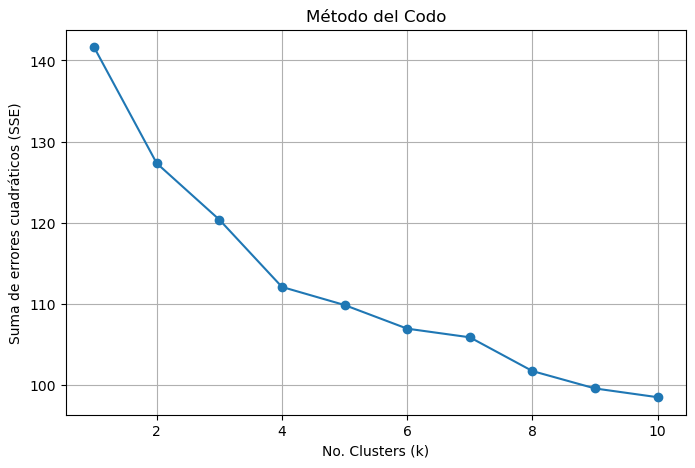

In [84]:
# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('No. Clusters (k)')
plt.ylabel('Suma de errores cuadráticos (SSE)') # Inertia
plt.title('Método del Codo')
plt.grid(True)
plt.show()

#### K-Means
- Aplicar algoritmo sobre los vectores de coactivación (cada fila como una instancia)->
- Se asignó 638 en 3 grupos. Se asume que los clusters son aprox. esféricos y de varianza similar (puede ser bueno para verificación inicial).

In [86]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
print("K-Means labels:", kmeans_labels[:10]) # Ver los primeros resultados

K-Means labels: [1 1 1 1 1 1 1 0 1 1]


C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### Gaussian Mixture Model (GMM)
Se asumen los datos tienen una mezcla de distribuciones gaussianas (es más flexible y puede capturar relaciones más complejas)

In [88]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X)
print("GMM labels:", gmm_labels[:10])

C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM labels: [1 1 1 1 1 1 1 0 1 1]


In [89]:
# Visualización- reducir a 2 dimensiones utilizando PCA
# Para ver la distribución de puntos según las etiquetas asignadas por cada método -ver estructura supuesta por cada modelo-)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Text(0.5, 1.0, 'K-Means Clustering (k=3)')

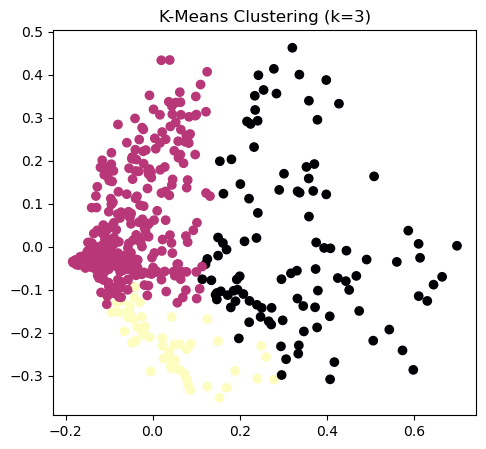

In [90]:
# Plot K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='magma')
plt.title("K-Means Clustering (k=3)")

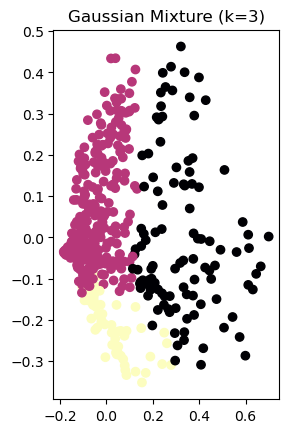

In [91]:
# Plot GMM
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='magma')
plt.title("Gaussian Mixture (k=3)")
plt.show()

# Parte II: Brain tumor
* Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
* Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth
* ¿Qué método recomendarías para este dataset?, ¿por qué?

In [93]:
##%%
# Cargar dataset
path_bt = r"C:\Users\melan\OneDrive\Documentos\Escuela\Modelos computacionales\Brain Tumor.csv"
df = pd.read_csv(path_bt) # Definir path
df.head() # Primeros valores

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [94]:
# Excluir columnas no numéricas (porque no aportan nada) y la columna 'Class' para el clustering
X = df.drop(columns=["Image", "Class"])

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_true = df["Class"].values # Guardar variable y etiquetas verdaderas
X.shape, X_scaled[:3] # Mostrar dimensiones y datos normalizados

((3762, 13),
 array([[-5.15700406e-001, -1.95790086e-001, -3.31438025e-002,
          5.04650142e-001,  6.78552579e-002, -9.72667778e-002,
         -2.68050200e-001,  6.85118050e-001,  4.70073392e-001,
          4.04099833e-001, -1.21708574e-001,  1.00071256e+000,
         -1.11785692e-168],
        [-1.29018130e-001,  2.02943099e-001,  3.65594000e-001,
          2.74604991e+000, -1.50203606e-001, -1.75880525e-001,
         -5.85492224e-001,  2.09028734e+000,  2.86558024e+000,
          1.34545658e+000, -7.99180836e-001,  1.26437684e+000,
         -1.11785692e-168],
        [-3.75012617e-001,  9.25765400e-001,  9.84679519e-001,
         -1.02670752e+000,  3.74530866e-001,  3.70475637e-002,
         -4.21009579e-001, -1.33598137e+000, -9.88339974e-001,
         -1.64939073e+000,  6.93704391e-001,  8.50635907e-001,
         -1.11785692e-168]]))

In [96]:
# Verificar
print("Media post-normalización:", np.mean(X_scaled, axis=0)) # Media de cada columna debe ser 0 aprox.
print("Desviación estándar post-normalización:", np.std(X_scaled, axis=0)) # Desviación estándar de cada columna debe ser 1 aprox.

Media post-normalización: [ 1.43543987e-016 -1.28434094e-016  2.94642921e-016 -1.81318720e-016
  9.82143069e-017 -7.55494669e-018  7.55494669e-017 -9.06593602e-017
  3.02197867e-017 -4.23077014e-016  1.20879147e-016  3.21085234e-016
 -4.72569516e-171]
Desviación estándar post-normalización: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


### Método del Codo
- Con K-means para determinar no. óptimo de clusters

In [100]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

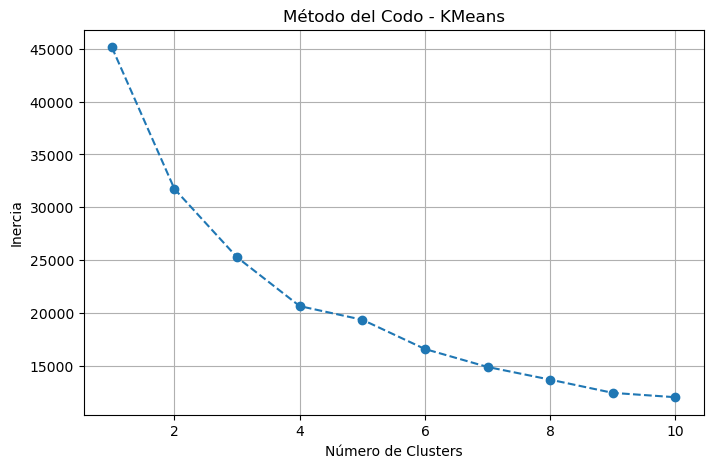

In [102]:
# Gráficar
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show() 

In [104]:
### K-means

SyntaxError: invalid character '≈' (U+2248) (3097161835.py, line 7)

In [106]:
from sklearn.metrics import confusion_matrix

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
cm_kmeans = confusion_matrix(df["Class"], kmeans_labels)
print("Matriz de Confusión - KMeans:\n", cm_kmeans)

Matriz de Confusión - KMeans:
 [[1978  101]
 [  80 1603]]


### Gaussian Mixture Model (GMM)
-  GMM es más flexible, especialmente si los clusters tienen formas elípticas o solapamiento.

In [112]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
cm_gmm = confusion_matrix(df["Class"], gmm_labels)
print("Matriz de Confusión - GMM:\n", cm_gmm)

Matriz de Confusión - GMM:
 [[2056   23]
 [  60 1623]]


### Agglomerative Clustering (Jerárquico) 
 Clustering jerárquico puede detectar estructuras más complejas, pero no escala tan bien con muchos datos

In [118]:

hier = AgglomerativeClustering(n_clusters=2)
hier_labels = hier.fit_predict(X_scaled)
cm_hier = confusion_matrix(df["Class"], hier_labels)
print("Matriz de Confusión - Clustering Jerárquico:\n", cm_hier)

Matriz de Confusión - Clustering Jerárquico:
 [[  26 2053]
 [1589   94]]


# III. De su propia investigación: métricas para verificar si estuvo bien realizada la clasificación

ión

**Métricas para saber si el modelo clasificó bien o solo se hizo el lindo**

**¿Qué es *precision*?**  
De todos los que el modelo dijo que eran positivos, ¿cuántos sí lo eran en serio?  
+ Sirve cuando NO queremos confundir a alguien que está bien con alguien que está mal.  
+ Ej: si un test dice que tienes una enfermedad, pero estás sana… es sería un *falo psitivo* y*precision* ayuda a evitarlos.

**¿Qué es *acQ  
Literal, qué tanto le atinó el modelo en total.  
+ Cuenta todas las veces que acertó, sin importar lclase.  
+ Peeero si hay muchas más personas sanas que enfermas (clases desbalanceadas), puede parecer que todo va bien aunque esté fallando.

**¿Qué es *recall*?**  
De todos los que SÍ eran positivos, ¿a cuántos encontró el modelo?  
+ Ideal cuando no quieres que se te escape ningún caso importante (como un paciente real).  
+ Reduce los *falsos negativos*, o sea, cuando alguien tiene algo pero .modelo dice que no 🙃

**¿Qué es el *f1-score*?**  
Es como el equilibrio zen entre *precision* y *recall*.  
+ Si una es muy baja, el *f1* lo nota y baja también.  
+ Es súper útil si tienes pocos datos de una clase y necesitas ser a con eso te sientes lista? 😄

# Parte IV
**ro, ¿qué es la matriz de confus**ión?
Es una tablita que te dice cuántas veces el molo **artó** y cuántas ves **se equocó**, ro **clasificando en positivo o negivinta:

|                    | **Predijo Positivo** | **Predijo Negativo** |
|--------------------|----------------------|----------------------|
| **Era Positivo**   | Verdadero Positivo (**VP**)  | Falso Negativo (**FN**)   |
| **Era Negativo**   | Falso Positivo (**FP**)       | Verdadero Negativo (* vimos:

---

### Cómo se conectan:

**Precision**  
→ Usa: **VP / (VP + FP)**  
O sea: de todos los que el modelo dijo *“sí es positivo”*, ¿cuántoslmente lo eran?

---

**Recall**  
→ Usa: **VP / (VP + FN)**  
O sea: de todos os que *sí eran positivos*, ¿cuántos detectó el modelo?  
(Si se leapan muchos, mal ahí.)

---

**Accuracy**  
→ Usa: **(VP + VN) / Total**  
O sea: ¿cuántas vece modelo le atinó en general?

---

**F1-score** 
→ Usa:el romedirmónico ene *precision* y *recall*  
Fórmula: **2 × (Preon × Recall) / (Precision + ecall**  
Sirve cuando necesitas qumgo un dibujo o infografía estética con esto? 👀

# Parte V
A partir del resultado de 2.B (2 cluster para Brain Tumor), calcular precision, accuracy, recall y f1-score

In [124]:
# Calcular las métricas mediante una función
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def metricas(y_true, y_pred):
    return {
        'Precision': precision_score(y_true, y_pred),
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

y_true = df['Class']  # La columna real (ground truth)
y_pred_kmeans = kmeans_labels  # Asegúrate de que tenga el mismo orden que y_true
y_pred_gmm = gmm_labels
y_pred_hier = hier_labels

In [126]:
# Evaluar para cada métrica
print("KMeans:", metricas(y_true, y_pred_kmeans)) # KMeans
print("GMM:", metricas(y_true, y_pred_gmm)) # GMM
print("Jerárquico:", metricas(y_true, y_pred_hier)) # Jerárquico

KMeans: {'Precision': 0.9407276995305164, 'Accuracy': 0.9518872939925571, 'Recall': 0.952465834818776, 'F1-Score': 0.9465603779155595}
GMM: {'Precision': 0.9860267314702309, 'Accuracy': 0.9779372674109517, 'Recall': 0.964349376114082, 'F1-Score': 0.9750675878642235}
Jerárquico: {'Precision': 0.043782021425244524, 'Accuracy': 0.03189792663476874, 'Recall': 0.055852644087938205, 'F1-Score': 0.04908616187989556}
